In [1]:
#imports
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from math import sqrt
from hyperopt import hp
from hyperopt.pyll import scope
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from catboost import CatBoostRegressor
import lightgbm as lgb
from sklearn.neural_network import MLPRegressor

import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from models.hyperopt_model import HyperoptModel

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# read the data
preprocessed_data = pd.read_pickle('../data/preprocessed_science_qualitative.pd')

# Create a dataframe
df = pd.DataFrame(preprocessed_data)

In [3]:
# Create two new dataframes, one with the training rows, one with the test rows
train, test=train_test_split(df, test_size=0.2, random_state=0)

In [4]:
# Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

Number of observations in the training data: 79342
Number of observations in the test data: 19836


Cross-validated scores: [ 0.77640798  0.77240131  0.76293654  0.78024672]
Average R^2 score: 0.772998137309


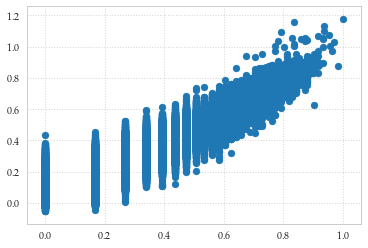

R2Score: 0.773335793392
RMSE: 0.08503123842014623


In [5]:
# Linear Regression 
dfLinear = df.copy()
y = dfLinear['score'].copy()
dfLinear.drop('score', axis=1, inplace=True) 

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(dfLinear, y, test_size=0.2)

model = linear_model.LinearRegression()

scores = cross_val_score(model, dfLinear, y, cv=4)
print("Cross-validated scores:", scores)
print("Average R^2 score:", scores.mean())

predictions = cross_val_predict(model, dfLinear, y, cv=4)
plt.scatter(y, predictions)
plt.show()

accuracy = metrics.r2_score(y, predictions)
print("R2Score:", accuracy)
rmse = sqrt(metrics.mean_squared_error(y,  predictions))
print("RMSE:", rmse)

In [6]:
    #some parameters
    DO_LOWESS = False
    hyperopt = True
    # Run Lasso Regression with hyperopt optimization
    lasso = HyperoptModel(train.copy(), test.copy(),'lasso', cv=4, max_evals = 500)
    features = list(df)
    features.remove('score')

    lasso.pipeline = Pipeline([
        ('estimate', linear_model.Lasso(**{'alpha': 0.0006577184991258585}))
    ])
    
    lasso.raw_features = features
    lasso.space = {
        'estimate__alpha': hp.uniform('estimate__alpha', 0, 10),
    }

    if hyperopt:
        lasso.run(do_lowess=DO_LOWESS)
    else:
        # train with default params
        lasso.pipeline.fit(X=lasso.X_train, y=lasso.y_train)
        lasso.model = lasso.pipeline
        lasso.stats()
        lasso.plot_feature_importance()
        lasso.plot_predicted_vs_actual(do_lowess=DO_LOWESS)
        lasso.qq_plot()

Performing parameters optimization...
[1/500]	cv_eval_time=0.63 sec	RMSE=0.178670	R^2=-0.000078
[2/500]	cv_eval_time=0.62 sec	RMSE=0.178669	R^2=-0.000076
[3/500]	cv_eval_time=0.63 sec	RMSE=0.178669	R^2=-0.000093
[4/500]	cv_eval_time=0.62 sec	RMSE=0.178684	R^2=-0.000014
[5/500]	cv_eval_time=0.65 sec	RMSE=0.178675	R^2=-0.000048
[6/500]	cv_eval_time=0.62 sec	RMSE=0.178670	R^2=-0.000013
[7/500]	cv_eval_time=0.64 sec	RMSE=0.178669	R^2=-0.000091
[8/500]	cv_eval_time=0.61 sec	RMSE=0.178669	R^2=-0.000002
[9/500]	cv_eval_time=0.63 sec	RMSE=0.178672	R^2=-0.000007
[10/500]	cv_eval_time=0.64 sec	RMSE=0.178671	R^2=-0.000031
[11/500]	cv_eval_time=0.62 sec	RMSE=0.178669	R^2=-0.000107
[12/500]	cv_eval_time=0.62 sec	RMSE=0.178670	R^2=-0.000153
[13/500]	cv_eval_time=0.62 sec	RMSE=0.178672	R^2=-0.000053
[14/500]	cv_eval_time=0.72 sec	RMSE=0.178672	R^2=-0.000004
[15/500]	cv_eval_time=0.64 sec	RMSE=0.178670	R^2=-0.000042
[16/500]	cv_eval_time=0.62 sec	RMSE=0.178670	R^2=-0.000028
[17/500]	cv_eval_time=0.65 

[139/500]	cv_eval_time=0.65 sec	RMSE=0.178672	R^2=-0.000028
[140/500]	cv_eval_time=0.64 sec	RMSE=0.178671	R^2=-0.000009
[141/500]	cv_eval_time=0.63 sec	RMSE=0.178670	R^2=-0.000111
[142/500]	cv_eval_time=0.67 sec	RMSE=0.178671	R^2=-0.000065
[143/500]	cv_eval_time=0.62 sec	RMSE=0.178669	R^2=-0.000083
[144/500]	cv_eval_time=0.65 sec	RMSE=0.178670	R^2=-0.000094
[145/500]	cv_eval_time=0.64 sec	RMSE=0.178671	R^2=-0.000062
[146/500]	cv_eval_time=0.61 sec	RMSE=0.178669	R^2=-0.000187
[147/500]	cv_eval_time=0.68 sec	RMSE=0.177964	R^2=0.007931
[148/500]	cv_eval_time=0.63 sec	RMSE=0.178675	R^2=-0.000031
[149/500]	cv_eval_time=0.64 sec	RMSE=0.178681	R^2=-0.000053
[150/500]	cv_eval_time=0.63 sec	RMSE=0.178669	R^2=-0.000041
[151/500]	cv_eval_time=0.65 sec	RMSE=0.178671	R^2=-0.000118
[152/500]	cv_eval_time=0.64 sec	RMSE=0.178669	R^2=-0.000003
[153/500]	cv_eval_time=0.64 sec	RMSE=0.178675	R^2=-0.000022
[154/500]	cv_eval_time=0.64 sec	RMSE=0.178669	R^2=-0.000058
[155/500]	cv_eval_time=0.72 sec	RMSE=0.17

[276/500]	cv_eval_time=0.64 sec	RMSE=0.178670	R^2=-0.000094
[277/500]	cv_eval_time=0.62 sec	RMSE=0.178670	R^2=-0.000007
[278/500]	cv_eval_time=2.86 sec	RMSE=0.112087	R^2=0.606367
[279/500]	cv_eval_time=1.13 sec	RMSE=0.093916	R^2=0.723697
[280/500]	cv_eval_time=0.65 sec	RMSE=0.178669	R^2=-0.000016
[281/500]	cv_eval_time=0.80 sec	RMSE=0.178670	R^2=-0.000054
[282/500]	cv_eval_time=0.63 sec	RMSE=0.178675	R^2=-0.000101
[283/500]	cv_eval_time=0.64 sec	RMSE=0.178670	R^2=-0.000062
[284/500]	cv_eval_time=0.64 sec	RMSE=0.178672	R^2=-0.000053
[285/500]	cv_eval_time=0.73 sec	RMSE=0.178672	R^2=-0.000075
[286/500]	cv_eval_time=0.63 sec	RMSE=0.178673	R^2=-0.000062
[287/500]	cv_eval_time=1.12 sec	RMSE=0.088845	R^2=0.752739
[288/500]	cv_eval_time=0.64 sec	RMSE=0.178670	R^2=-0.000203
[289/500]	cv_eval_time=0.67 sec	RMSE=0.178669	R^2=-0.000025
[290/500]	cv_eval_time=0.65 sec	RMSE=0.178672	R^2=-0.000041
[291/500]	cv_eval_time=0.62 sec	RMSE=0.178669	R^2=-0.000119
[292/500]	cv_eval_time=0.62 sec	RMSE=0.1786

[413/500]	cv_eval_time=1.35 sec	RMSE=0.099192	R^2=0.691780
[414/500]	cv_eval_time=0.64 sec	RMSE=0.178671	R^2=-0.000064
[415/500]	cv_eval_time=0.66 sec	RMSE=0.178670	R^2=-0.000066
[416/500]	cv_eval_time=0.68 sec	RMSE=0.178674	R^2=-0.000031
[417/500]	cv_eval_time=0.64 sec	RMSE=0.178671	R^2=-0.000022
[418/500]	cv_eval_time=0.63 sec	RMSE=0.178670	R^2=-0.000101
[419/500]	cv_eval_time=0.64 sec	RMSE=0.178669	R^2=-0.000059
[420/500]	cv_eval_time=0.64 sec	RMSE=0.178671	R^2=-0.000055
[421/500]	cv_eval_time=0.65 sec	RMSE=0.178669	R^2=-0.000057
[422/500]	cv_eval_time=0.91 sec	RMSE=0.123059	R^2=0.525453
[423/500]	cv_eval_time=0.63 sec	RMSE=0.178669	R^2=-0.000030
[424/500]	cv_eval_time=0.64 sec	RMSE=0.178668	R^2=-0.000070
[425/500]	cv_eval_time=0.64 sec	RMSE=0.178672	R^2=-0.000101
[426/500]	cv_eval_time=0.64 sec	RMSE=0.178671	R^2=-0.000105
[427/500]	cv_eval_time=0.64 sec	RMSE=0.178672	R^2=-0.000102
[428/500]	cv_eval_time=0.66 sec	RMSE=0.178669	R^2=-0.000063
[429/500]	cv_eval_time=0.64 sec	RMSE=0.178

In [ ]:
    #some parameters
    DO_LOWESS = False
    hyperopt = True
    # Run Ridge Regression with hyperopt optimization
    ridge = HyperoptModel(train.copy(), test.copy(),'ridge', cv=4, max_evals = 500)
    features = list(df)
    features.remove('score')
    ridge.raw_features = features

    ridge.pipeline = Pipeline([
        ('estimate', linear_model.Ridge(**{'alpha': 0.05231780585024858}))
    ])
    
    ridge.space = {
        'estimate__alpha': hp.uniform('estimate__alpha', 0, 1000),
    }

    if hyperopt:
        ridge.run(do_lowess=DO_LOWESS)
    else:
        # train with default params
        ridge.pipeline.fit(X=ridge.X_train, y=ridge.y_train)
        ridge.model = ridge.pipeline
        ridge.stats()
        ridge.plot_feature_importance()
        ridge.plot_predicted_vs_actual(do_lowess=DO_LOWESS)
        ridge.qq_plot()

Performing parameters optimization...
[1/500]	cv_eval_time=0.54 sec	RMSE=0.087572	R^2=0.759711
[2/500]	cv_eval_time=0.54 sec	RMSE=0.086547	R^2=0.765337
[3/500]	cv_eval_time=0.56 sec	RMSE=0.086111	R^2=0.767686
[4/500]	cv_eval_time=0.55 sec	RMSE=0.087385	R^2=0.760793
[5/500]	cv_eval_time=0.54 sec	RMSE=0.086516	R^2=0.765524
[6/500]	cv_eval_time=0.55 sec	RMSE=0.086676	R^2=0.764663
[7/500]	cv_eval_time=0.54 sec	RMSE=0.086422	R^2=0.765988
[8/500]	cv_eval_time=0.54 sec	RMSE=0.086485	R^2=0.765720
[9/500]	cv_eval_time=0.54 sec	RMSE=0.086791	R^2=0.763996
[10/500]	cv_eval_time=0.53 sec	RMSE=0.087186	R^2=0.761830
[11/500]	cv_eval_time=0.53 sec	RMSE=0.087780	R^2=0.758599
[12/500]	cv_eval_time=0.56 sec	RMSE=0.087811	R^2=0.758475
[13/500]	cv_eval_time=0.56 sec	RMSE=0.087157	R^2=0.762011
[14/500]	cv_eval_time=0.57 sec	RMSE=0.089277	R^2=0.750299
[15/500]	cv_eval_time=0.55 sec	RMSE=0.088081	R^2=0.756942
[16/500]	cv_eval_time=0.54 sec	RMSE=0.088824	R^2=0.752828
[17/500]	cv_eval_time=0.54 sec	RMSE=0.08702

[142/500]	cv_eval_time=0.53 sec	RMSE=0.085801	R^2=0.769358
[143/500]	cv_eval_time=0.57 sec	RMSE=0.088234	R^2=0.756067
[144/500]	cv_eval_time=0.54 sec	RMSE=0.086745	R^2=0.764239
[145/500]	cv_eval_time=0.54 sec	RMSE=0.086326	R^2=0.766432
[146/500]	cv_eval_time=0.54 sec	RMSE=0.085945	R^2=0.768587
[147/500]	cv_eval_time=0.54 sec	RMSE=0.085394	R^2=0.771400
[148/500]	cv_eval_time=0.54 sec	RMSE=0.085726	R^2=0.769760
[149/500]	cv_eval_time=0.52 sec	RMSE=0.085998	R^2=0.768301
[150/500]	cv_eval_time=0.54 sec	RMSE=0.086119	R^2=0.767612
[151/500]	cv_eval_time=0.52 sec	RMSE=0.085832	R^2=0.769139
[152/500]	cv_eval_time=0.54 sec	RMSE=0.086237	R^2=0.767026
[153/500]	cv_eval_time=0.57 sec	RMSE=0.085418	R^2=0.771397
[154/500]	cv_eval_time=0.53 sec	RMSE=0.085904	R^2=0.768841
[155/500]	cv_eval_time=0.53 sec	RMSE=0.086052	R^2=0.768069
[156/500]	cv_eval_time=0.57 sec	RMSE=0.085704	R^2=0.769837
[157/500]	cv_eval_time=0.54 sec	RMSE=0.085967	R^2=0.768464
[158/500]	cv_eval_time=0.54 sec	RMSE=0.086166	R^2=0.7673

[281/500]	cv_eval_time=0.50 sec	RMSE=0.085302	R^2=0.772019
[282/500]	cv_eval_time=0.55 sec	RMSE=0.085833	R^2=0.769167
[283/500]	cv_eval_time=0.64 sec	RMSE=0.086234	R^2=0.767051
[284/500]	cv_eval_time=0.54 sec	RMSE=0.085931	R^2=0.768727
[285/500]	cv_eval_time=0.55 sec	RMSE=0.086995	R^2=0.762903
[286/500]	cv_eval_time=0.51 sec	RMSE=0.086148	R^2=0.767423
[287/500]	cv_eval_time=0.52 sec	RMSE=0.085742	R^2=0.769636
[288/500]	cv_eval_time=0.58 sec	RMSE=0.085982	R^2=0.768390
[289/500]	cv_eval_time=0.59 sec	RMSE=0.086056	R^2=0.768046
[290/500]	cv_eval_time=0.79 sec	RMSE=0.085880	R^2=0.768905
[291/500]	cv_eval_time=0.57 sec	RMSE=0.085640	R^2=0.770234
[292/500]	cv_eval_time=0.68 sec	RMSE=0.085317	R^2=0.771874
[293/500]	cv_eval_time=0.58 sec	RMSE=0.085815	R^2=0.769293
[294/500]	cv_eval_time=0.58 sec	RMSE=0.086110	R^2=0.767641
[295/500]	cv_eval_time=0.54 sec	RMSE=0.086316	R^2=0.766667
[296/500]	cv_eval_time=0.57 sec	RMSE=0.086514	R^2=0.765546
[297/500]	cv_eval_time=0.57 sec	RMSE=0.088882	R^2=0.7524

[420/500]	cv_eval_time=0.57 sec	RMSE=0.085311	R^2=0.772014
[421/500]	cv_eval_time=0.54 sec	RMSE=0.085829	R^2=0.769281
[422/500]	cv_eval_time=0.53 sec	RMSE=0.085920	R^2=0.768705
[423/500]	cv_eval_time=0.54 sec	RMSE=0.086046	R^2=0.768040
[424/500]	cv_eval_time=0.52 sec	RMSE=0.085671	R^2=0.770016
[425/500]	cv_eval_time=0.55 sec	RMSE=0.085879	R^2=0.768916
[426/500]	cv_eval_time=0.53 sec	RMSE=0.085975	R^2=0.768447
[427/500]	cv_eval_time=0.52 sec	RMSE=0.085799	R^2=0.769377
[428/500]	cv_eval_time=0.53 sec	RMSE=0.086152	R^2=0.767477
[429/500]	cv_eval_time=0.54 sec	RMSE=0.085668	R^2=0.770010
[430/500]	cv_eval_time=0.52 sec	RMSE=0.086093	R^2=0.767820
[431/500]	cv_eval_time=0.53 sec	RMSE=0.085923	R^2=0.768693
[432/500]	cv_eval_time=0.52 sec	RMSE=0.085853	R^2=0.769007
[433/500]	cv_eval_time=0.55 sec	RMSE=0.085614	R^2=0.770344
[434/500]	cv_eval_time=0.53 sec	RMSE=0.086037	R^2=0.768122
[435/500]	cv_eval_time=0.55 sec	RMSE=0.085359	R^2=0.771765
[436/500]	cv_eval_time=0.52 sec	RMSE=0.085777	R^2=0.7694

In [ ]:
    #some parameters
    DO_LOWESS = False
    hyperopt = True
    # Run MLPRegressor with hyperopt optimization
    nn = HyperoptModel(train.copy(), test.copy(),'nn', cv=3, max_evals=500)
    features = list(df)
    features.remove('score')
    nn.raw_features = features

    nn.pipeline = Pipeline([
        ('estimate', MLPRegressor())
    ])
   
    nn.space = {
         'estimate__alpha' : hp.uniform('estimate__alpha', 0.001, 1),
         'estimate__activation' : hp.choice('estimate__activation', ['logistic']), # 'identity', 'logistic', 'tanh', 'relu'
         #'estimate__learning_rate' : hp.choice('estimate__learning_rate', ['constant', 'invscaling', 'adaptive']),
         'estimate__hidden_layer_sizes' : scope.int(hp.uniform('estimate__hidden_layer_sizes', 1, 100)),
         'estimate__solver' : hp.choice('estimate__solver', ['adam']), #'lbfgs', 'sgd',
         #'estimate__max_iter' : scope.int(hp.uniform('estimate__max_iter', 500, 1000))
    }

    if hyperopt:
        nn.run(do_lowess=DO_LOWESS)
    else:
        # train with default params
        nn.pipeline.fit(X=nn.X_train, y=nn.y_train)
        nn.model = cat.pipeline
        nn.stats()
        nn.plot_predicted_vs_actual(do_lowess=DO_LOWESS)
        nn.plot_feature_importance()
        nn.qq_plot()

Performing parameters optimization...
[1/500]	cv_eval_time=9.07 sec	RMSE=0.095891	R^2=0.713479
[2/500]	cv_eval_time=9.72 sec	RMSE=0.093695	R^2=0.719873
[3/500]	cv_eval_time=11.01 sec	RMSE=0.087707	R^2=0.762881
[4/500]	cv_eval_time=9.21 sec	RMSE=0.096008	R^2=0.716703
[5/500]	cv_eval_time=8.07 sec	RMSE=0.104474	R^2=0.659142
[6/500]	cv_eval_time=9.04 sec	RMSE=0.096345	R^2=0.713692
[7/500]	cv_eval_time=9.74 sec	RMSE=0.087766	R^2=0.759508
[8/500]	cv_eval_time=9.93 sec	RMSE=0.097286	R^2=0.705709
[9/500]	cv_eval_time=8.66 sec	RMSE=0.086169	R^2=0.761317
[10/500]	cv_eval_time=9.70 sec	RMSE=0.086581	R^2=0.763412
[11/500]	cv_eval_time=9.89 sec	RMSE=0.102168	R^2=0.679396
[12/500]	cv_eval_time=9.88 sec	RMSE=0.087193	R^2=0.761587
[13/500]	cv_eval_time=11.74 sec	RMSE=0.097529	R^2=0.698132
[14/500]	cv_eval_time=8.38 sec	RMSE=0.105036	R^2=0.647756
[15/500]	cv_eval_time=12.17 sec	RMSE=0.090381	R^2=0.738195
[16/500]	cv_eval_time=10.90 sec	RMSE=0.091181	R^2=0.739794
[17/500]	cv_eval_time=11.01 sec	RMSE=0.

In [ ]:
    #some parameters
    DO_LOWESS = False
    hyperopt = True
    # Run CatBoostRegressor with hyperopt optimization
    cat = HyperoptModel(train.copy(), test.copy(),'cat', cv=3, max_evals = 30)

    cat.pipeline = Pipeline([
        ('estimate', CatBoostRegressor())
    ])
    
    features = list(df)
    features.remove('score')
    cat.raw_features = features
    
    cat.space = {
        'estimate__iterations': hp.choice('estimate__iterations', [1300]),
        'estimate__loss_function': hp.choice('estimate__loss_function', ['RMSE']),
        'estimate__train_dir': hp.choice('estimate__train_dir', ['outputs/cat']),
        'estimate__thread_count': hp.choice('estimate__thread_count', [4]),
        'estimate__used_ram_limit': hp.choice('estimate__used_ram_limit', [1024 * 1024 * 1024 * 4]),  # 4gb
        'estimate__random_seed': hp.choice('estimate__random_seed', [0]),

        'estimate__learning_rate': hp.loguniform('estimate__learning_rate', -5, 0),
        'estimate__random_strength': hp.choice('estimate__random_strength', [1, 20]),
        'estimate__l2_leaf_reg': hp.loguniform('estimate__l2_leaf_reg', 0, np.log(10)),
        'estimate__bagging_temperature': hp.uniform('estimate__bagging_temperature', 0, 1),
    }

    """
    find the best number of trees (following https://tech.yandex.com/catboost/doc/dg/concepts/parameter-tuning_trees-number-docpage/#parameter-tuning_trees-number)
    need to also substitute the CatBoostRegressor parameters with:
        ('estimate', CatBoostRegressor(iterations=10000, loss_function='RMSE', auto_stop_pval=1e-4, use_best_model=True, train_dir='outputs/cat_trees', verbose=True))
    """
    # num_trees_train, num_trees_eval = train_test_split(train, test_size=0.2, random_state=0)
    # X = num_trees_train[list(filter(lambda column: column in cat.raw_features, cat.train.columns))]
    # y = num_trees_train['score']
    #
    # eval_X = num_trees_eval[list(filter(lambda column: column in cat.raw_features, cat.train.columns))]
    # eval_X = cat.pipeline.named_steps['prepare_features'].fit_transform(eval_X)
    # eval_set = (eval_X, num_trees_eval['score'])
    #
    # cat.pipeline.fit(X=X, y=y, estimate__eval_set=eval_set)
    # cat.model = cat.pipeline
    # print(cat.model.named_steps['estimate'].get_params())
    # cat.model.named_steps['estimate'].save_model('tmp/cat.model'.encode('utf-8'))

    if hyperopt:
        cat.run(do_lowess=DO_LOWESS)
    else:
        # train with default params
        cat.pipeline.fit(X=cat.X_train, y=cat.y_train)
        cat.model = cat.pipeline
        cat.stats()
        cat.plot_predicted_vs_actual(do_lowess=DO_LOWESS)
        cat.plot_feature_importance()
        #cat.qq_plot()

In [ ]:
    #some parameters
    DO_LOWESS = False
    hyperopt = True
    # Run LGBMRegressor with hyperopt optimization
    lgbm = HyperoptModel(train.copy(), test.copy(), 'lgbm', cv=3, max_evals=50)
    lgbm.pipeline = Pipeline([
        ('estimate', lgb.LGBMRegressor())
    ])
    
    features = list(df)
    features.remove('score')
    lgbm.raw_features = features
   
    """ find number of trees """
    # num_trees_train, num_trees_eval = train_test_split(train, test_size=0.2, random_state=0)
    # X = num_trees_train[list(filter(lambda column: column in lgbm.raw_features, lgbm.train.columns))]
    # y = num_trees_train['score']
    #
    # eval_X = num_trees_eval[list(filter(lambda column: column in lgbm.raw_features, lgbm.train.columns))]
    # eval_X = lgbm.pipeline.named_steps['prepare_features'].fit_transform(eval_X)
    # eval_set = (eval_X, num_trees_eval['score'])
    #
    # best = lgbm.pipeline.fit(X=X, y=y, estimate__eval_set=eval_set, estimate__early_stopping_rounds=10)
    # print(best.named_steps['estimate'].best_iteration)

    lgbm.space = {
        'estimate__objective': hp.choice('estimate__objective', ['regression']),
        'estimate__n_estimators': hp.choice('estimate__n_estimators', [400]),
        'estimate__seed': hp.choice('estimate__seed', [0]),

        'estimate__learning_rate': hp.loguniform('estimate__learning_rate', -7, 0),
        'estimate__num_leaves': scope.int(hp.qloguniform('estimate__num_leaves', 1, 7, 1)),
        'estimate__feature_fraction': hp.uniform('estimate__feature_fraction', 0.5, 1),
        'estimate__bagging_fraction': hp.uniform('estimate__bagging_fraction', 0.5, 1),
        'estimate__min_data_in_leaf': scope.int(hp.qloguniform('estimate__min_data_in_leaf', 0, 6, 1)),
        'estimate__min_sum_hessian_in_leaf': hp.loguniform('estimate__min_sum_hessian_in_leaf', -16, 5),
        'estimate__lambda_l1': hp.choice('lambda_l1', [0, hp.loguniform('estimate__lambda_l1_positive', -16, 2)]),
        'estimate__lambda_l2': hp.choice('lambda_l2', [0, hp.loguniform('estimate__lambda_l2_positive', -16, 2)]),
    }

    if hyperopt:
        lgbm.run(do_lowess=DO_LOWESS)
    else:
        # train with default params
        lgbm.pipeline.fit(X=lgbm.X_train, y=lgbm.y_train)
        lgbm.model = lgbm.pipeline
        lgbm.stats()
        lgbm.plot_predicted_vs_actual()
        lgbm.plot_feature_importance()